# Практическая работа №3: Статистический анализ социальных сетей
Выполнила студентка гр. 0383 Петровская Евгения. Вариант №60

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

Диада - элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

Цензус диад - 3 числа M, A, N, где $M = \sum_{i<j} X_{ij} X_{ji}$, 
$A = X_{++} - 2M$, 
$N = C^2_g - A - M$

Индекс взаимности Каца-Пауэлла - индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга
    $\infty < \rho_{кр} \leqslant 1$
    
* Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.
* Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.
* Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным
* Для фиксированного выбора из $d$ акторов:
    По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$
    
   Вероятность того, что связь будет взаимной для двух акторов:
    $\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}$
    
* Для свободного выбора:    
   По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$
    Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):
    $P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}$
    
Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети
    $\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}$
   где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, \n"
    $M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g$
    $f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g$
    $g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+})$
    
Вычисление доверительного интервала для оценки P
   * Оценка параметра $P$:\n",
    $\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}$
   * Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$
    $\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$
    $\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$
   $z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


1. С помощью библиотеки igraph смоделировать случайный орграф $G_{d}$ на основе модели Эрдеша—Реньи: $G_{d}$ = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

Вариант №60: g = 72, p = 0.52, ${P_{0}}$ = 0.58, $\alpha$ = 0.03

In [65]:
library(igraph)
library(statnet)

g <- 72
p <- 0.52
p0 <- 0.58
a <- 0.03

set.seed(1)

graph <- erdos.renyi.game(g, p, type='gnp', directed = T)
net <- network(as_adjacency_matrix(graph), directed = T)

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



В данном задании используется тип G(n, p), где граф строится случайным добавлением рёбер. Вероятность построить граф с кол-вом узлов = g и ребер = M равна:
$p^{M}(1-p)^{C_{n}^{2}-M}$

чем ближе параметр к 1, тем больше вероятность того, что результирующий граф будет иметь большое кол-во ребер.

2. Отобразить полученный орграф.

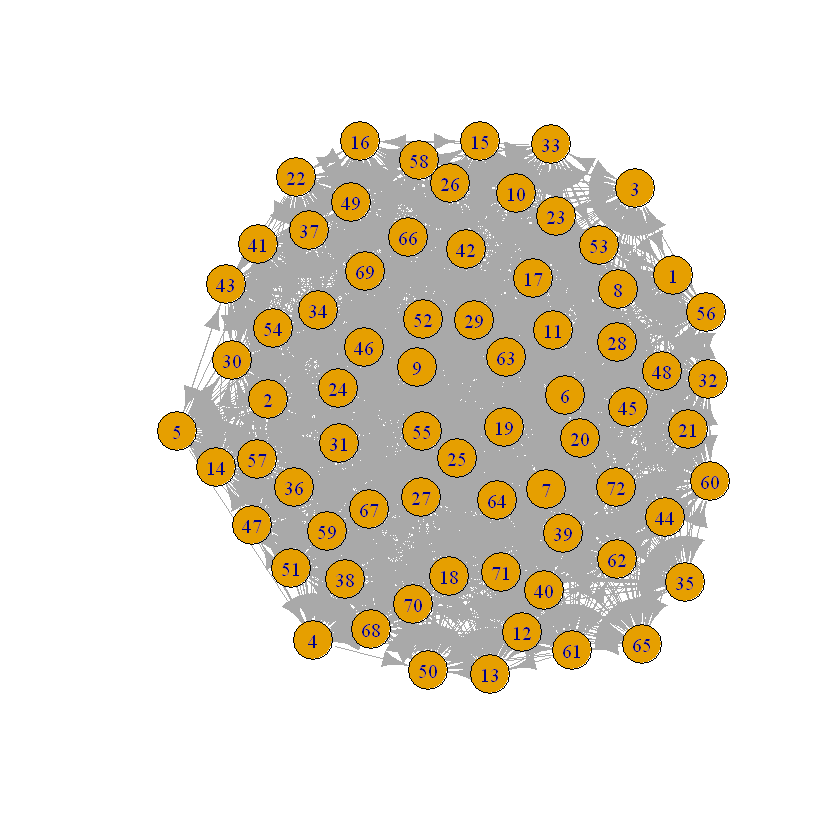

In [66]:
plot(graph)

3. Вычислить «пятичисловую сводку» для графа $G_{d}$.

In [67]:
cat('1. vetrices = size = ', vcount(graph), '\n')
cat('edges = ', ecount(graph), '\n')
cat('2. Density = ', edge_density(graph, loops = FALSE), '\n')
cat('3. Components = ', count_components(graph, mode = "strong"), '\n')
cat('4. Diameter = ', diameter(graph, directed = FALSE, unconnected = FALSE, weights = NULL), '\n')
cat('5. Transitivity = ', transitivity(
  graph,
  type = "undirected",
  vids = NULL,
  weights = NULL,
  isolates = "zero"
), '\n')

1. vetrices = size =  72 
edges =  2652 
2. Density =  0.5187793 
3. Components =  1 
4. Diameter =  2 
5. Transitivity =  0.7739974 


4. Вычислить цензус диад. Сделать выводы.

In [68]:
census <- dyad_census(graph)
census

$mut
[1] 675

$asym
[1] 1302

$null
[1] 579

Вывод: 
Число взаимных диад M = 981

Число ассиметричных A = 630

Число пар, между которыми связи нет, = 100.

5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [71]:
d <- 40 ##Пусть d = 40
M <- census$mut

fix_kp <- (2*(g-1)*M - g * d^2)/(g*d*(g - 1 - d))

cat('Fixed choice: ', fix_kp, '\n')

adj_matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(adj_matrix))
L2 <- sum(rowSums(adj_matrix)^2)

free_kp <- (2*(g - 1)^2 * M - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)

cat('Free choice: ', free_kp, '\n')

Fixed choice:  -0.2167339 
Free choice:  -0.0200365 


Как видно по результатам вычислений, как при фиксированном выборе, так и при свободном акторы если и склонны образовывать связи, то только односторонние

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [76]:
p_fix <- (d / (g-1)) * ((d/(g-1)) + fix_kp*(g - 1 - d) / (g - 1))
cat('P for fixed choice: ', p_fix, '\n')

p_free <- (rowSums(adj_matrix) * colSums(adj_matrix))/(g - 1)^2
p_free_avg <- sum(P_free)/g
cat('P for free choice: ', p_free_avg, '\n')
     

P for fixed choice:  0.2640845 
P for free choice:  0.2688703 


7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [90]:
rSum <- rowSums(adj_matrix)

p_B <- function(m, m_min, m_max) {
    res <- (m - m_min)/(m_max - m_min)
    return(res)
}

f_func <- function(rSum, t, g) {
    x_sum <- sum(rSum[1:t])
    combin <- factorial(t)/(factorial(2) * factorial(t-2))
    res <- (x_sum - t*(g-1) - combin)
    return(res)
}

g_func <- function(rSum, t, g) {
    x_sum <- sum(rSum[1:t])
    min_sum <- 0   
    for (i in (t+1):g) {
        min_sum <- min_sum + min(c(t, rSum[i]))
    }
    res <- (x_sum - t*(t-1) - min_sum)
    return(res)
}

g_f <- rep(2, g - 1)
for (t in 2:(g-1)) {
    g_f[t] <- g_func(rSum, t, g)
}

f_f <- rep(2, g)
for (t in 2:g) {
    f_f[t] <- f_func(rSum, t, g)
}

m_min <- max(f_f)
m_max <- floor(0.5 * sum(rSum[1:g]) - max(g_f))

p_B(M, m_min, m_max)

[1] 0.5090772

Как видно, получившийся индекс примерно равен значению p = 0.52

8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе $G_{d}$ имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼=0.03. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [94]:
alpha <- 0.03
l <- sum(adj_matrix)
binom.test(l, g*(g-1), p = 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2652, number of trials = 5112, p-value = 0.007548
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5049774 0.5325598
sample estimates:
probability of success 
             0.5187793 


p-value меньше 𝛼 (0.007548 < 0.03) => нулевая гипотеза не выполняется и вер-ть построения между двумя любыми акторами ребра p $\neq$ 0.5. p-value есть максимальный уровень значимости, при котором гипотеза не отвергается.

9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе $G_{d}$ имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), $P_{0}$) при уровне значимости 𝛼=0.33. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.
$P_{0}$ = 0.58

In [95]:
binom.test(l, g*(g-1), p = p0)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2652, number of trials = 5112, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.58
95 percent confidence interval:
 0.5049774 0.5325598
sample estimates:
probability of success 
             0.5187793 


p-value (< 2.2e-16) сильно меньше 𝛼=0.33 => нулевая гипотеза не выполняется, и вер-ть построения между двумя любыми акторами ребра p $\neq$ 0.5. p-value есть максимальный уровень значимости, при котором гипотеза не отвергается.

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [101]:
p_estim <- l/(g*(g-1)) 
cat('Оценка параметра P: ', p_estim, '\n')


laplace <- 0.5 - (alpha/2)
laplace

##2.16	0.4846
##2.18	0.4854
## ^^^ значения табл Лапласса, берем z_а как 2.18 

z_a <- 2.18

p_low <- p_estim - z_a * sqrt((p_estim * (1 - p_estim))/(g * (g - 1)))
p_up <- p_estim + z_a * sqrt((p_estim * (1 - p_estim))/(g * (g - 1))) 
cat('P_lower = ', p_low, '; P_upper = ', p_up, ';\n') ## p = 0.52

Оценка параметра P:  0.5187793 


[1] 0.485

P_lower =  0.503545 ; P_upper =  0.5340137 ;


По условию p = 0.52, с учетом получившихся значений можно сделать вывод, что доверительный интервал был рассчитан верно.

## Выводы

При выполнении данной практической работы был создан случайный орграф на основе модели Эрдеша—Реньи с 72 вершинами и с вероятностью появления ребра между вершинами 0.52. Данный граф был отображен, для него была вычислена пятичисловая сводка, цензус диад, индексы Каца—Пауэла и Бандиопадхьяйя.